# Problem defintion
- Predicting the survival of patients

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
from sklearn.preprocessing import LabelEncoder
pd.set_option('max_columns', None)
import missingno as mns
import warnings
warnings.filterwarnings('ignore')

### Import the data

In [2]:
df = pd.read_csv('Datasetnew.csv')

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 78.4+ MB


In [4]:
for column in df.columns:
     print(f"{column:>25} = {df[column].unique().shape[0]},{df[column].isna().sum()}")

             encounter_id = 91713,0
               patient_id = 91713,0
              hospital_id = 147,0
           hospital_death = 2,0
                      age = 75,4228
                      bmi = 34889,3429
         elective_surgery = 2,0
                ethnicity = 7,1395
                   gender = 3,25
                   height = 402,1334
    hospital_admit_source = 16,21409
         icu_admit_source = 6,112
                   icu_id = 241,0
            icu_stay_type = 3,0
                 icu_type = 8,0
         pre_icu_los_days = 9757,0
       readmission_status = 1,0
                   weight = 3410,2720
       apache_2_diagnosis = 45,1662
      apache_3j_diagnosis = 400,1101
    apache_post_operative = 2,0
               arf_apache = 3,715
               bun_apache = 477,19262
        creatinine_apache = 1128,18853
          gcs_eyes_apache = 5,1901
         gcs_motor_apache = 7,1901
        gcs_unable_apache = 3,1037
        gcs_verbal_apache = 6,1901
           glucose_a

<Axes: >

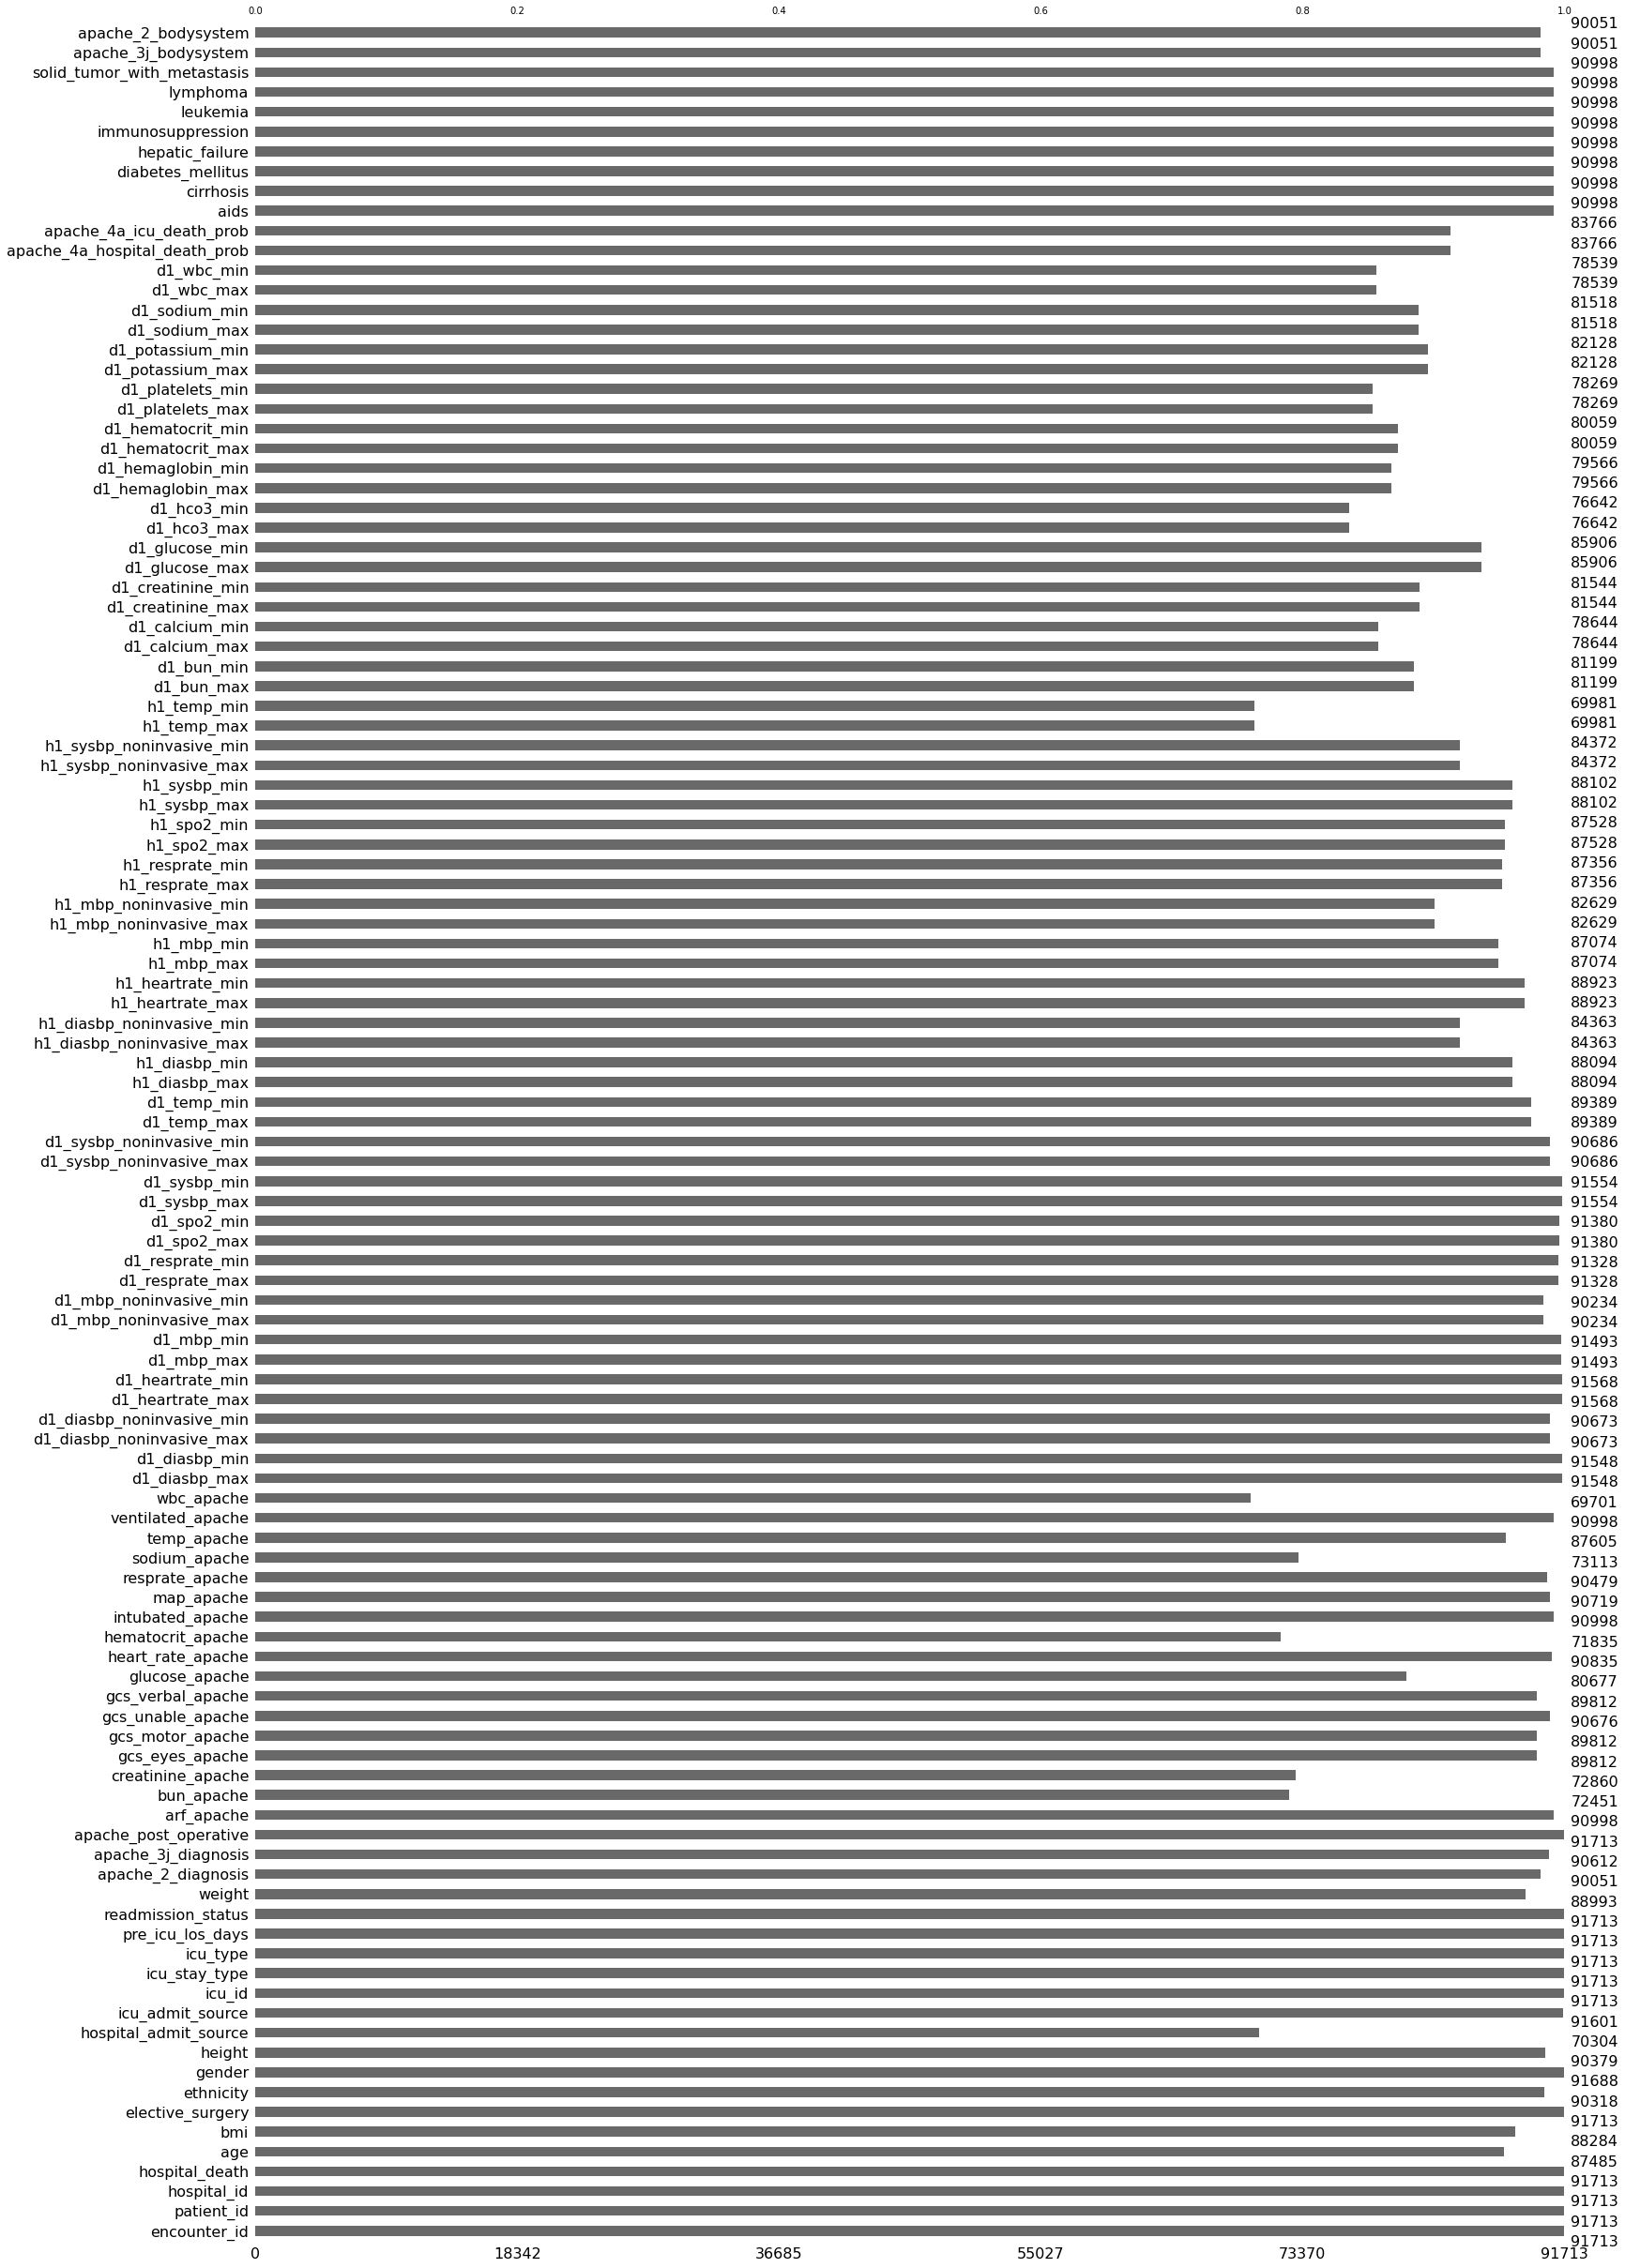

In [5]:
mns.bar(df)

In [6]:
for column in df.columns:
    if df[column].isna().sum() > 5000:
        df.drop([column],axis=1,inplace = True)

In [7]:
df.drop(['encounter_id','patient_id','hospital_id','icu_id'],axis=1,inplace = True)

In [8]:
for column in df.columns:
     print(f"{column:>35} = {df[column].unique().shape[0]:^5}|{df[column].isna().sum():^5}")

                     hospital_death =   2  |  0  
                                age =  75  |4228 
                                bmi = 34889|3429 
                   elective_surgery =   2  |  0  
                          ethnicity =   7  |1395 
                             gender =   3  | 25  
                             height =  402 |1334 
                   icu_admit_source =   6  | 112 
                      icu_stay_type =   3  |  0  
                           icu_type =   8  |  0  
                   pre_icu_los_days = 9757 |  0  
                 readmission_status =   1  |  0  
                             weight = 3410 |2720 
                 apache_2_diagnosis =  45  |1662 
                apache_3j_diagnosis =  400 |1101 
              apache_post_operative =   2  |  0  
                         arf_apache =   3  | 715 
                    gcs_eyes_apache =   5  |1901 
                   gcs_motor_apache =   7  |1901 
                  gcs_unable_apache =   3  |1037 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               91713 non-null  int64  
 1   age                          87485 non-null  float64
 2   bmi                          88284 non-null  float64
 3   elective_surgery             91713 non-null  int64  
 4   ethnicity                    90318 non-null  object 
 5   gender                       91688 non-null  object 
 6   height                       90379 non-null  float64
 7   icu_admit_source             91601 non-null  object 
 8   icu_stay_type                91713 non-null  object 
 9   icu_type                     91713 non-null  object 
 10  pre_icu_los_days             91713 non-null  float64
 11  readmission_status           91713 non-null  int64  
 12  weight                       88993 non-null  float64
 13  apache_2_diagnos

In [10]:
df['ethnicity'].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [11]:
df['ethnicity'].isna().sum()

1395

In [12]:
df['ethnicity']=df['ethnicity'].fillna(df['ethnicity'].mode()[0])

In [13]:
df['ethnicity']=df['ethnicity'].replace({'Caucasian':1,'African American':2,'Other/Unknown':3,"Hispanic":4,'Asian':5,'Native American':6})

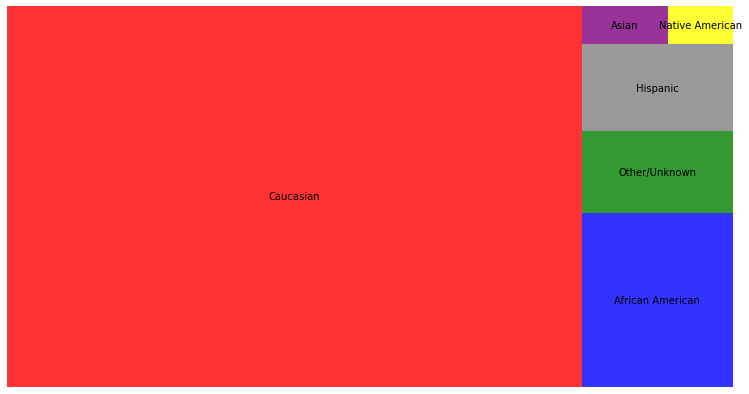

In [14]:
plt.rcParams["figure.figsize"] = (13,7)
d = df.groupby('ethnicity')[['hospital_death']].sum().reset_index().hospital_death.values.tolist()
label=['Caucasian','African American','Other/Unknown',"Hispanic",'Asian','Native American']
color=['red','blue','green','grey','purple','yellow']
squarify.plot(sizes=d,label=label,color=color,alpha=.8 )
plt.axis('off')
plt.show()

In [15]:
df['gender'].value_counts()

M    49469
F    42219
Name: gender, dtype: int64

In [16]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [17]:
df['gender'].isna().sum()

0

In [18]:
df['gender']=df['gender'].replace({'M':1,'F':2})

In [19]:
df['gender'].value_counts()

1    49494
2    42219
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

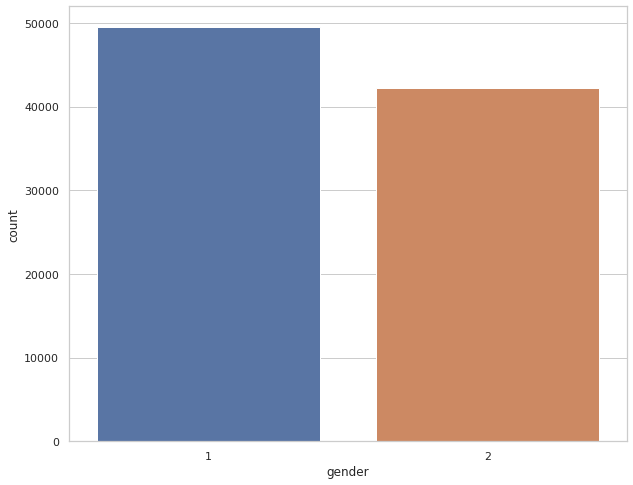

In [20]:
plt.rcParams["figure.figsize"] = (10,8)
sns.set_theme(style="whitegrid")
sns.countplot(x=df['gender'])

In [21]:
df['icu_admit_source'].value_counts()

Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64

In [22]:
df['icu_admit_source']=df['icu_admit_source'].fillna(df['icu_admit_source'].mode()[0])

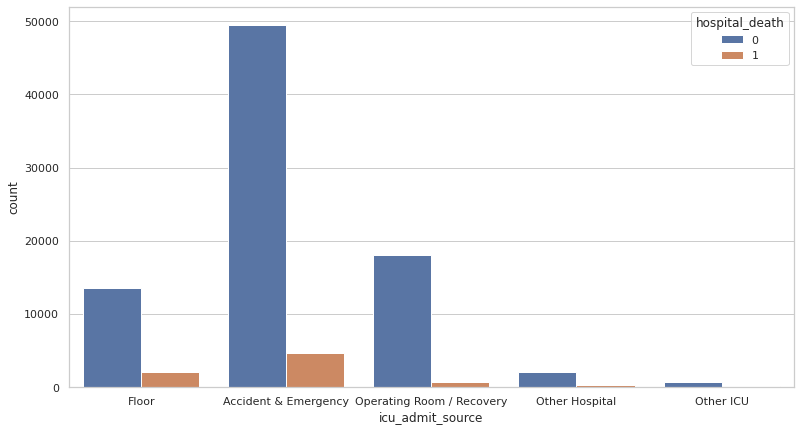

In [23]:
plt.rcParams["figure.figsize"] = (13,7)
sns.countplot(data=df,x='icu_admit_source',hue='hospital_death')
plt.show()

In [24]:
df['icu_admit_source']=df['icu_admit_source'].replace({'Accident & Emergency':1,'Operating Room / Recovery':2,'Floor':3,"Other Hospital":4,'Other ICU':5})

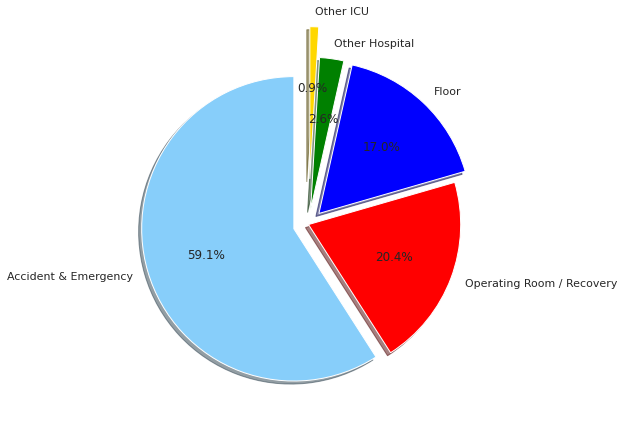

In [25]:
labels = ['Accident & Emergency','Operating Room / Recovery','Floor',"Other Hospital",'Other ICU']
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode =(0.1,0.0,0.1,0.1,0.3)
plt.pie(df['icu_admit_source'].value_counts().values, shadow =True,labels= labels, colors=colors,explode=explode,startangle=90, autopct='%.1f%%') 
plt.show()

In [26]:
df['icu_stay_type'].value_counts()

admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64

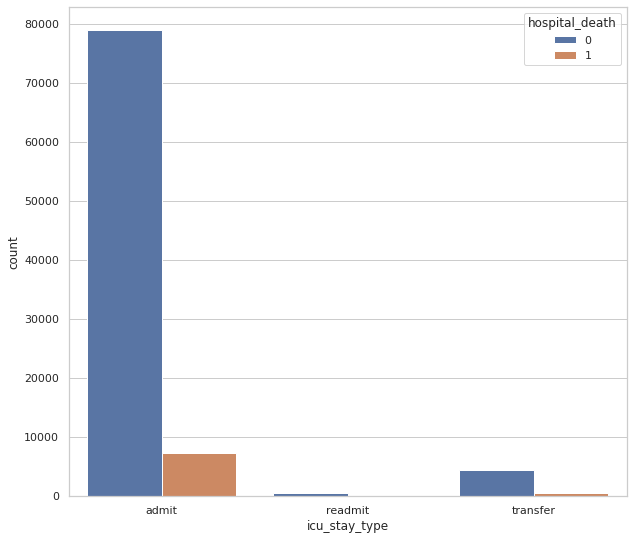

In [27]:
plt.rcParams["figure.figsize"] = (10,9)
sns.countplot(data=df,x='icu_stay_type',hue='hospital_death')
plt.show()

In [28]:
df['icu_stay_type']=df['icu_stay_type'].replace({'admit':1,'transfer':2,'readmit':3})

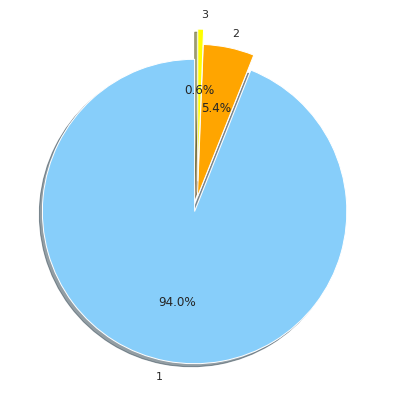

In [29]:
plt.rcParams["figure.figsize"] = (7,7)
labels = df['icu_stay_type'].value_counts().index
colors = ['lightskyblue','orange','yellow']
explode =(0.1,0.0,0.1,)
plt.pie(df['icu_stay_type'].value_counts().values, shadow =True,labels= labels, colors=colors,explode=explode,startangle=90, autopct='%.1f%%') 
plt.show()

In [30]:
df['icu_type'].value_counts()

Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64

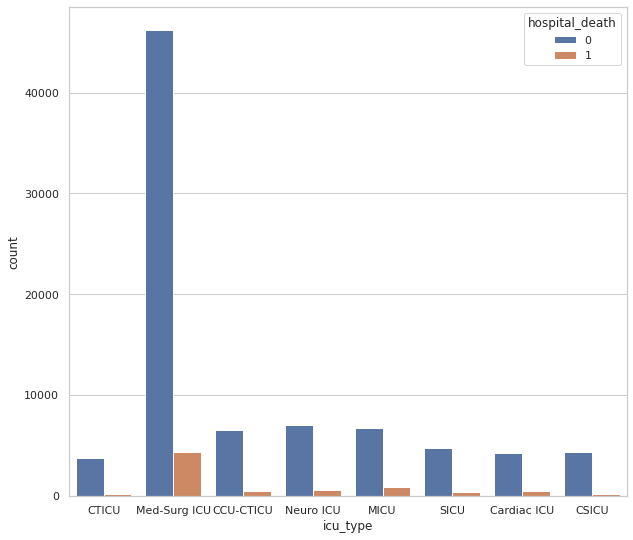

In [31]:
plt.rcParams["figure.figsize"] = (10,9)
sns.countplot(data=df,x='icu_type',hue='hospital_death')
plt.show()

In [32]:
df['icu_type']=df['icu_type'].replace({'Med-Surg ICU':1,'MICU':2,'Neuro ICU':3,'CCU-CTICU':4,'SICU':5,'Cardiac ICU':6,'CSICU':7,'CTICU':8})

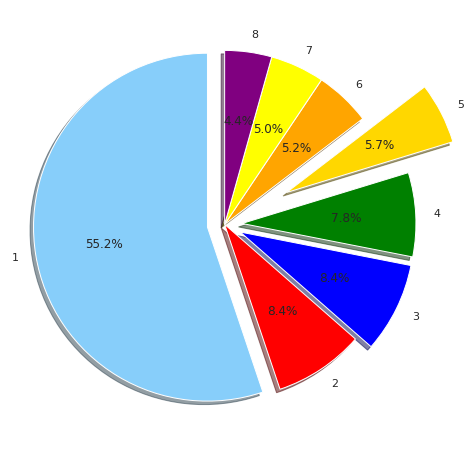

In [33]:
plt.rcParams["figure.figsize"] = (8,8)
labels = df['icu_type'].value_counts().index
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','orange','yellow','purple']
explode =(0.1,0.0,0.1,0.1,0.4,0,0,0)
plt.pie(df['icu_type'].value_counts().values, shadow =True,labels= labels, colors=colors,explode=explode,startangle=90, autopct='%.1f%%') 
plt.show()

In [34]:
df['apache_3j_bodysystem'].value_counts()

Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

In [35]:
df['apache_3j_bodysystem']=df['apache_3j_bodysystem'].fillna(df['apache_3j_bodysystem'].mode()[0])

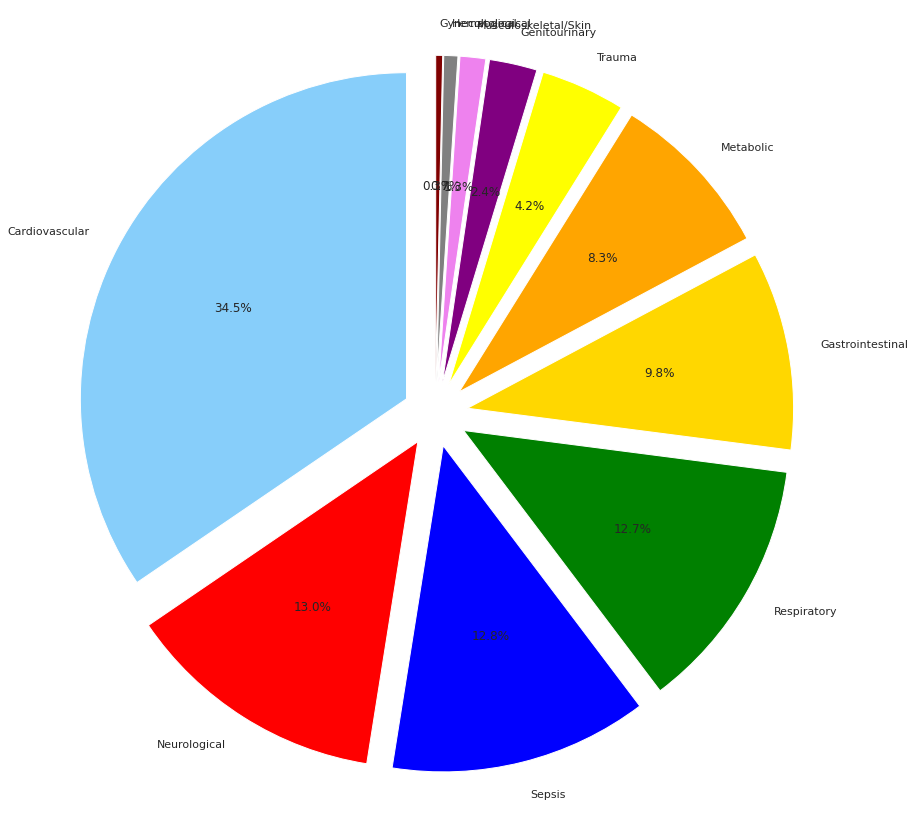

In [36]:
plt.rcParams["figure.figsize"] = (15,15)
labels = df['apache_3j_bodysystem'].value_counts().index
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','orange','yellow','purple','violet','grey','maroon']
explode =(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(df['apache_3j_bodysystem'].value_counts().values,labels= labels, colors=colors,explode=explode,startangle=90, autopct='%.1f%%') 
plt.show()

In [37]:
df['apache_3j_bodysystem']=df['apache_3j_bodysystem'].replace({'Cardiovascular':1,'Neurological':2,'Sepsis':3,'Respiratory':4,'Gastrointestinal':5,'Metabolic':6,'Trauma':7,'Genitourinary':8,'Musculoskeletal/Skin':9,'Hematological':10,'Gynecological':11})

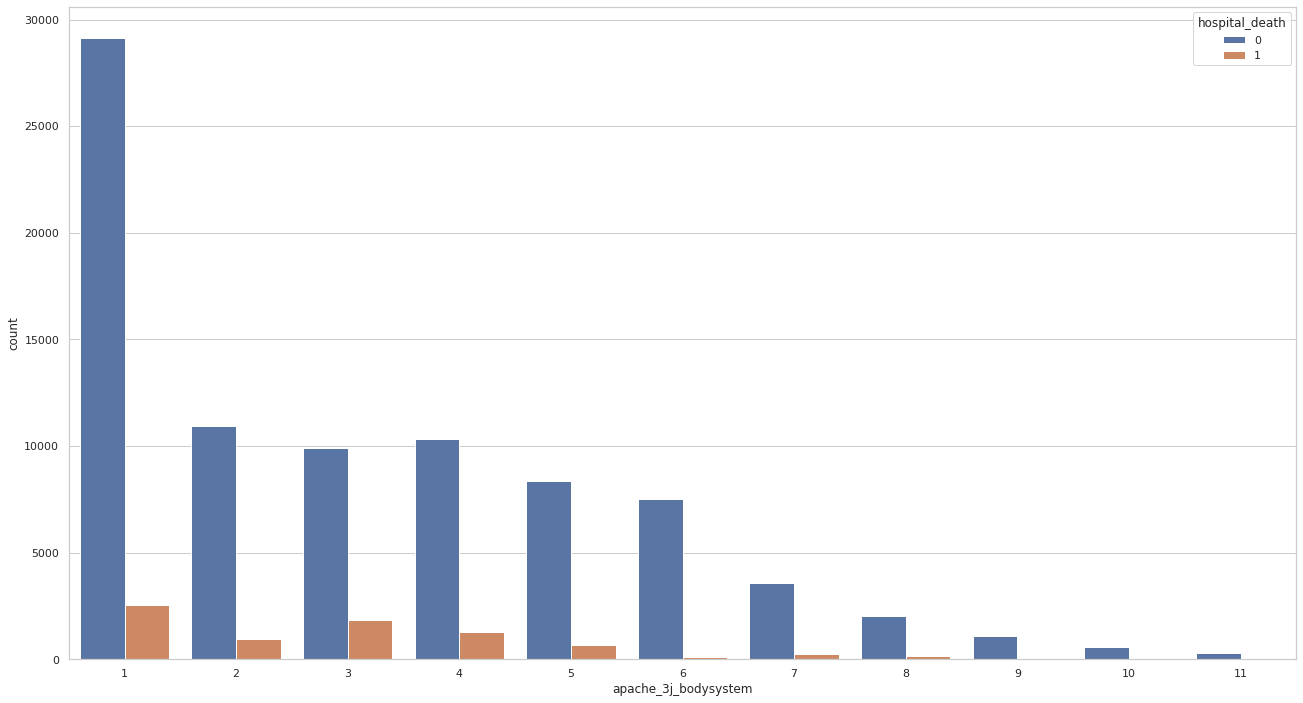

In [38]:
plt.rcParams["figure.figsize"] = (22,12)
sns.countplot(data=df,x='apache_3j_bodysystem',hue='hospital_death')
plt.show()

In [39]:
df['apache_2_bodysystem'].value_counts()

Cardiovascular         38816
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64

In [40]:
df['apache_2_bodysystem']=df['apache_2_bodysystem'].fillna(df['apache_2_bodysystem'].mode()[0])

In [41]:
df['apache_2_bodysystem']=df['apache_2_bodysystem'].replace({'Undefined Diagnoses':'Undefined diagnoses'})

In [42]:
df['apache_2_bodysystem'].value_counts()

Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Undefined diagnoses     4114
Trauma                  3842
Renal/Genitourinary     2460
Haematologic             638
Name: apache_2_bodysystem, dtype: int64

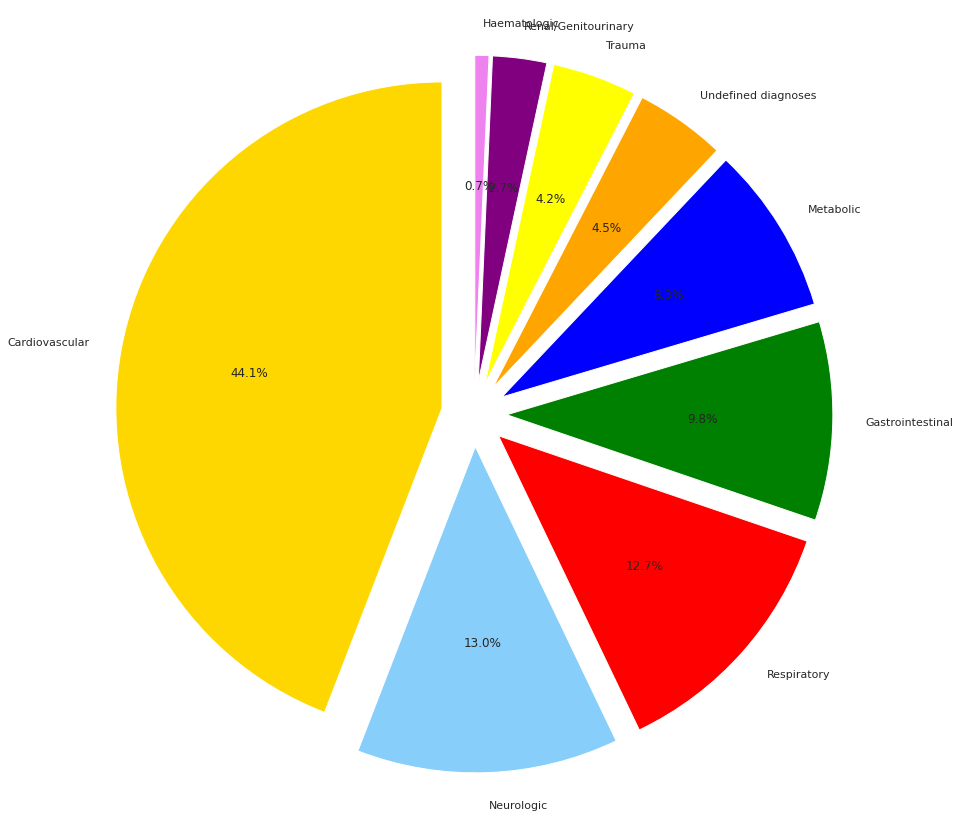

In [43]:
plt.rcParams["figure.figsize"] = (15,15)
labels = df['apache_2_bodysystem'].value_counts().index
colors = ['gold','lightskyblue', 'red', 'green','blue','orange','yellow','purple','violet']
explode =(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(df['apache_2_bodysystem'].value_counts().values,labels= labels, colors=colors,explode=explode,startangle=90, autopct='%.1f%%') 
plt.show()

In [44]:
df['apache_2_bodysystem']=df['apache_2_bodysystem'].replace({'Cardiovascular':1,'Neurologic':2,'Respiratory':3,'Gastrointestinal':4,'Metabolic':5,'Trauma':6,'Undefined diagnoses':7,'Renal/Genitourinary':8,'Haematologic':9})

In [45]:
df['apache_2_bodysystem'].value_counts()

1    40478
2    11896
3    11609
4     9026
5     7650
7     4114
6     3842
8     2460
9      638
Name: apache_2_bodysystem, dtype: int64

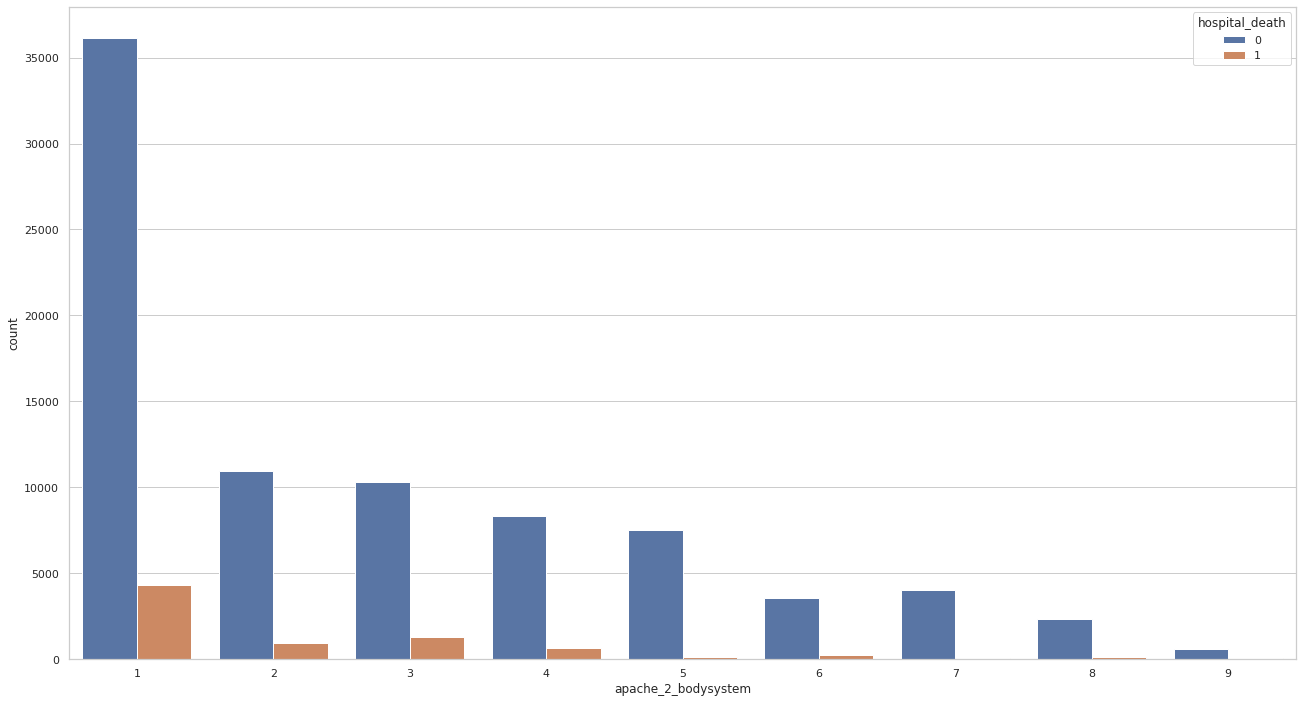

In [46]:
plt.rcParams["figure.figsize"] = (22,12)
sns.countplot(data=df,x='apache_2_bodysystem',hue='hospital_death')
plt.show()

### Checking the spread of dependent variable


In [47]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

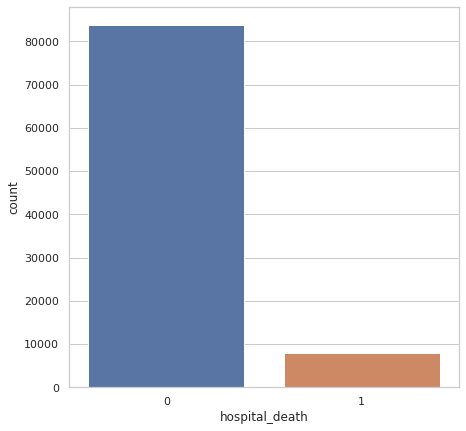

In [48]:
plt.rcParams["figure.figsize"] = (7,7)
sns.countplot(x=df['hospital_death'])
plt.show()

## Filling up the NA Values

In [49]:
cols = df.select_dtypes([np.number]).columns
df[cols] = df[cols].fillna(df[cols].mean())
df[cols]

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.000000,22.730000,0,1,1,180.3,3,1,8,0.541667,0,73.90000,113.0,502.01,0,0.0,3.000000,6.000000,0.000000,4.000000,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.000000,63.00000,119.000000,108.00000,86.00000,85.000000,26.000000,18.000000,100.000000,74.00000,131.000000,115.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,0,77.000000,27.420000,0,1,2,160.0,3,1,1,0.927778,0,70.20000,108.0,203.01,0,0.0,1.000000,3.000000,0.000000,1.000000,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.000000,48.00000,114.000000,100.00000,85.00000,57.000000,31.000000,28.000000,95.000000,70.00000,95.000000,71.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3
2,0,25.000000,31.950000,0,1,2,172.7,1,1,1,0.000694,0,95.30000,122.0,703.03,0,0.0,3.000000,6.000000,0.000000,5.000000,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.000000,58.00000,96.000000,78.00000,91.00000,83.000000,20.000000,16.000000,98.000000,91.00000,148.000000,124.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,5
3,0,81.000000,22.640000,1,1,2,165.1,2,1,8,0.000694,0,61.70000,203.0,1206.03,1,0.0,4.000000,6.000000,0.000000,5.000000,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.000000,44.00000,100.000000,96.00000,92.00000,71.000000,12.000000,11.000000,100.000000,99.00000,136.000000,106.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0,19.000000,29.185818,0,1,1,188.0,1,1,1,0.073611,0,84.02834,119.0,601.01,0,0.0,3.465049,5.471195,0.009528,3.994778,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.000000,68.00000,89.000000,76.00000,104.00000,92.000000,22.633614,17.211525,100.000000,100.00000,130.000000,120.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.000000,23.060250,0,1,1,177.8,3,1,6,0.298611,0,72.90000,113.0,501.06,0,0.0,4.000000,6.000000,0.000000,5.000000,115.0,0.0,48.0,9.0,36.6,1.0,104.0,44.0,104.0,44.0,115.0,70.0,109.0,48.0,109.0,48.0,27.0,9.0,100.0,85.0,128.0,67.0,128.0,67.0,38.2,36.6,55.000000,44.00000,111.000000,96.00000,64.00000,55.000000,24.000000,16.000000,98.000000,97.00000,94.000000,87.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,1
91709,0,56.000000,47.179671,0,1,2,183.0,3,1,1,0.120139,0,158.00000,113.0,501.05,0,0.0,4.000000,6.000000,0.000000,5.000000,100.0,0.0,62.0,33.0,37.4,0.0,73.0,40.0,73.0,40.0,100.0,76.0,82.0,47.0,82.0,47.0,33.0,12.0,100.0,45.0,127.0,65.0,127.0

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
from sklearn.preprocessing import LabelEncoder
pd.set_option('max_columns', None)
import missingno as mns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [51]:
df1 = pd.read_csv('Datasetnew.csv')

In [52]:
# df1.drop(['encounter_id','patient_id','hospital_id','icu_id'],axis=1,inplace = True)

for column in df1.columns:
    if df1[column].isna().sum() > 5000:
        df1.drop([column],axis=1,inplace = True)

cols = df1.select_dtypes([np.number]).columns
df1[cols] = df1[cols].fillna(df1[cols].mean())

object_col = df1.select_dtypes(include='object')
for obj in object_col:
    df1[obj]=df1[obj].fillna(df1[obj].mode()[0])

In [53]:
df_dv = df1[['hospital_death','ethnicity','gender','encounter_id','patient_id','hospital_id','icu_id','gcs_motor_apache','gcs_eyes_apache','gcs_verbal_apache','ventilated_apache','intubated_apache','apache_3j_bodysystem','icu_admit_source','apache_2_bodysystem','age','height','pre_icu_los_days','apache_2_diagnosis','apache_3j_diagnosis','map_apache','resprate_apache','temp_apache','d1_heartrate_max','d1_mbp_min','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_temp_max','d1_temp_min','h1_diasbp_max','h1_heartrate_max','h1_heartrate_min','h1_mbp_min','h1_resprate_min','h1_spo2_min','h1_sysbp_max','h1_sysbp_min']]

In [54]:
df1.to_csv('df_dv',index = False)

In [55]:
df_cat = df[['elective_surgery','readmission_status','ethnicity','gender','icu_admit_source','icu_stay_type','icu_type','apache_post_operative','arf_apache',
'gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache','ventilated_apache','aids','cirrhosis','diabetes_mellitus',
'hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','apache_3j_bodysystem','apache_2_bodysystem']]

### Feature Selection using Logistic regression and Cramer's V

In [56]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for each independent variable and the dependent variable
dependent_variable = 'hospital_death'  # Replace with your dependent variable's name
cramer_vs = {}
for col in df_cat.columns:
    cramer_vs[col] = cramers_v(df_cat[col], df[dependent_variable])

# Sort the results to see the impact of each independent variable
sorted_cramer_vs = sorted(cramer_vs.items(), key=lambda x: x[1], reverse=True)
sum = 0
for col, cramer_v in sorted_cramer_vs:
    print(f"{col}: {cramer_v}")
    sum = sum + cramer_v
cramer_v/len(sorted_cramer_vs)

readmission_status: nan
gcs_motor_apache: 0.28142246536093757
gcs_eyes_apache: 0.26722709047520654
gcs_verbal_apache: 0.24162194774714402
ventilated_apache: 0.2276474637071159
intubated_apache: 0.1724754525005049
apache_3j_bodysystem: 0.12644652887883465
icu_admit_source: 0.11074602972364618
apache_2_bodysystem: 0.10914013972476498
elective_surgery: 0.09346567541622419
apache_post_operative: 0.0835605997205967
gcs_unable_apache: 0.052978321653042504
solid_tumor_with_metastasis: 0.051656110757676274
icu_type: 0.05111496661323073
immunosuppression: 0.0446924042570009
cirrhosis: 0.04030143540871816
hepatic_failure: 0.03973098411555656
leukemia: 0.031016382276566078
arf_apache: 0.028669985842365967
lymphoma: 0.020755670167513982
diabetes_mellitus: 0.018179615048268538
icu_stay_type: 0.015844590666192062
ethnicity: 0.011717213307168987
aids: 0.010155963498427423
gender: 0.005911982467413143


0.0002364792986965257

In [57]:
cols = df1.drop(['hospital_death','readmission_status','elective_surgery','ethnicity','gender','icu_admit_source','icu_stay_type','icu_type','apache_post_operative','arf_apache',
'gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache','intubated_apache','ventilated_apache',
'aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma',
'solid_tumor_with_metastasis','apache_3j_bodysystem','apache_2_bodysystem'],axis=1,inplace=False)

col_regression = cols.columns


import statsmodels.api as sm

# Select the relevant columns from the dataframe
X = cols
X = sm.add_constant(X)

# Define the dependent variable
y = df1['hospital_death']

# Fit a logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()


# Get the p-values from the results
p_values = result.pvalues
p_values

# Select significant variables (p-value < 0.05)
significant_vars = p_values[p_values < 0.05].index.tolist()
significant_vars.remove('const')

Optimization terminated successfully.
         Current function value: 0.235150
         Iterations 7


In [58]:
df_category = df[['gcs_motor_apache','gcs_eyes_apache','gcs_verbal_apache','ventilated_apache','intubated_apache','apache_3j_bodysystem','icu_admit_source','apache_2_bodysystem']]

In [59]:
df_num = df1[['age','height','pre_icu_los_days','apache_2_diagnosis','apache_3j_diagnosis','map_apache','resprate_apache','temp_apache','d1_heartrate_max','d1_mbp_min','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_temp_max','d1_temp_min','h1_diasbp_max','h1_heartrate_max','h1_heartrate_min','h1_mbp_min','h1_resprate_min','h1_spo2_min','h1_sysbp_max','h1_sysbp_min']]

In [60]:
df_final = pd.concat([df_category,df_num],axis=1) 

In [61]:
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.000000,22.730000,0,1,1,180.3,3,1,8,0.541667,0,73.90000,113.0,502.01,0,0.0,3.000000,6.000000,0.000000,4.000000,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.000000,63.00000,119.000000,108.00000,86.00000,85.000000,26.000000,18.000000,100.000000,74.00000,131.000000,115.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,0,77.000000,27.420000,0,1,2,160.0,3,1,1,0.927778,0,70.20000,108.0,203.01,0,0.0,1.000000,3.000000,0.000000,1.000000,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.000000,48.00000,114.000000,100.00000,85.00000,57.000000,31.000000,28.000000,95.000000,70.00000,95.000000,71.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3
2,0,25.000000,31.950000,0,1,2,172.7,1,1,1,0.000694,0,95.30000,122.0,703.03,0,0.0,3.000000,6.000000,0.000000,5.000000,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.000000,58.00000,96.000000,78.00000,91.00000,83.000000,20.000000,16.000000,98.000000,91.00000,148.000000,124.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,5
3,0,81.000000,22.640000,1,1,2,165.1,2,1,8,0.000694,0,61.70000,203.0,1206.03,1,0.0,4.000000,6.000000,0.000000,5.000000,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.000000,44.00000,100.000000,96.00000,92.00000,71.000000,12.000000,11.000000,100.000000,99.00000,136.000000,106.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0,19.000000,29.185818,0,1,1,188.0,1,1,1,0.073611,0,84.02834,119.0,601.01,0,0.0,3.465049,5.471195,0.009528,3.994778,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.000000,68.00000,89.000000,76.00000,104.00000,92.000000,22.633614,17.211525,100.000000,100.00000,130.000000,120.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.000000,23.060250,0,1,1,177.8,3,1,6,0.298611,0,72.90000,113.0,501.06,0,0.0,4.000000,6.000000,0.000000,5.000000,115.0,0.0,48.0,9.0,36.6,1.0,104.0,44.0,104.0,44.0,115.0,70.0,109.0,48.0,109.0,48.0,27.0,9.0,100.0,85.0,128.0,67.0,128.0,67.0,38.2,36.6,55.000000,44.00000,111.000000,96.00000,64.00000,55.000000,24.000000,16.000000,98.000000,97.00000,94.000000,87.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,1
91709,0,56.000000,47.179671,0,1,2,183.0,3,1,1,0.120139,0,158.00000,113.0,501.05,0,0.0,4.000000,6.000000,0.000000,5.000000,100.0,0.0,62.0,33.0,37.4,0.0,73.0,40.0,73.0,40.0,100.0,76.0,82.0,47.0,82.0,47.0,33.0,12.0,100.0,45.0,127.0,65.0,127.0

### Scaling of the features

In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_final)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_data, columns=df_final.columns)

# scaled_df


In [63]:
scaled_df = pd.concat([df['hospital_death'],scaled_df],axis=1)

In [64]:
scaled_df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

### Balancing the data using SMOTE

In [65]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming you have a DataFrame 'df' with a target column 'target' (0 for minority class, 1 for majority class)

# Separate the features and target variable
X = scaled_df.drop('hospital_death', axis=1)
y = scaled_df['hospital_death']

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)



In [80]:
resampled_df

,gcs_motor_apache,gcs_eyes_apache,gcs_verbal_apache,ventilated_apache,intubated_apache,apache_3j_bodysystem,icu_admit_source,apache_2_bodysystem,age,height,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,map_apache,resprate_apache,temp_apache,d1_heartrate_max,d1_mbp_min,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_min,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,hospital_death
0,1.000000,0.666667,0.750000,0.000000,0.000000,0.200000,0.50,0.000000,0.712329,0.738140,0.138498,0.057971,0.228074,0.000000,0.571429,0.947368,0.512605,0.266667,0.100000,1.000000,0.740000,1.000000,0.898494,0.292453,0.618644,0.666667,0.500000,0.095238,0.740000,0.378378,0.439716,0
1,0.400000,0.000000,0.000000,1.000000,0.000000,0.300000,0.50,0.250000,0.835616,0.390478,0.140596,0.033816,0.092229,0.037500,0.517857,0.394737,0.504202,0.177778,0.120000,1.000000,0.700000,0.250000,0.543224,0.226415,0.576271,0.592593,0.235849,0.148148,0.700000,0.135135,0.127660,0
2,1.000000,0.666667,1.000000,0.000000,0.000000,0.500000,0.00,0.500000,0.123288,0.607981,0.135558,0.101449,0.319404,0.175000,0.589286,0.605263,0.319328,0.511111,0.080000,0.980000,0.910000,0.395833,0.813906,0.481132,0.423729,0.388889,0.481132,0.084656,0.910000,0.493243,0.503546,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.25,0.000000,0.890411,0.477822,0.135558,0.492754,0.547932,0.125000,0.000000,0.355263,0.487395,0.688889,0.070000,1.000000,0.950000,0.604167,0.492472,0.235849,0.457627,0.555556,0.367925,0.058201,0.990000,0.412162,0.375887,0
4,0.894239,0.821683,0.748694,0.000000,0.000000,0.600000,0.00,0.625000,0.041096,0.870012,0.135955,0.086957,0.273053,0.393750,0.214286,0.605263,0.260504,0.755556,0.160000,1.000000,0.960000,0.437500,0.813906,0.584906,0.364407,0.370370,0.566038,0.091066,1.000000,0.371622,0.475177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167591,0.858698,1.000000,0.823373,0.000000,0.000000,0.400000,0.00,0.375000,0.645194,0.542662,0.136158,0.111111,0.138571,0.035325,0.277176,0.548742,0.761782,0.318238,0.157065,0.977065,0.881740,0.397623,0.744214,0.118131,0.720249,0.780900,0.297990,0.107085,0.911740,0.230170,0.242369,1
167592,0.800000,0.000000,0.000000,1.000000,0.000000,0.227812,0.00,0.069529,0.606529,0.571781,0.135859,0.043192,0.190672,0.667306,0.506975,0.540254,0.496743,0.300136,0.131656,1.000000,0.821064,0.350716,0.730321,0.494695,0.560223,0.681020,0.664448,0.115212,0.893374,0.367145,0.197073,1
167593,0.894239,0.821683,0.748694,0.325721,0.151223,0.000000,1.00,0.000000,0.634377,0.490084,0.156796,0.407738,0.253610,0.300099,0.389482,0.567694,0.704258,0.262614,0.041767,1.000000,0.706518,0.820903,0.868773,0.422704,0.786638,0.898302,0.500990,0.146570,0.988066,0.553345,0.545199,1
167594,1.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.00,0.000000,0.824535,0.904328,0.136683,0.057971,0.227638,0.180056,0.482143,0.505322,0.458880,0.515481,0.152022,0.988015,0.947978,0.300093,0.685408,0.377499,0.533898,0.668505,0.582927,0.091037,0.971985,0.456651,0.615455,1


In [67]:
x=resampled_df.drop('hospital_death',axis=1)
y=resampled_df['hospital_death']

### Splitting the data into training data & Testing data

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [69]:
def create_model_lg():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    return model

In [70]:
def create_model_svm():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)
    return model

In [71]:
def create_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(x_train, y_train)
    return model

In [72]:
def create_model_rf():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=20, max_depth=5)
    model.fit(x_train, y_train)
    return model

In [73]:
def create_model_gb():
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier(n_estimators=20, max_depth=5)
    model.fit(x_train, y_train)
    return model

In [74]:
def create_model_ada():
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(x_train, y_train)
    return model

In [75]:
def create_model_xgb():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

In [76]:
model_lg = create_model_lg()

model_svm = create_model_svm()

model_dt = create_model_dt()

model_rf = create_model_rf()

model_gb = create_model_gb()

model_xgb = create_model_xgb()

model_ada = create_model_ada()

In [77]:
def evaluate_model(model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    y_true = y_test
    y_pred = model.predict(x_test)
    
    accuracy = f"{accuracy_score(y_true, y_pred):0.2f}"
    precision = f"{precision_score(y_true, y_pred):0.2f}"
    recall = f"{recall_score(y_true, y_pred):0.2f}"
    f1 = f"{f1_score(y_true, y_pred):0.2f}"
    
    return accuracy, precision, recall, f1

In [78]:
models = [
    {"name": "LG", "model": model_lg},
    {"name": "SVM", "model": model_svm},
    {"name": "DT", "model": model_dt},
    {"name": "RF", "model": model_rf},
    {"name": "GB", "model": model_gb},
    {"name": "Ada", "model": model_ada},
    {"name": "XGB", "model": model_xgb}
]

print('-' * 72)
print(f"|{'Algo':^10}|{'Accuracy':^15}|{'Precision':^15}|{'Recall':^15}|{'F1':^10}|")
print('-' * 72)
for model_info in models:
    evaluation = evaluate_model(model_info['model'])
    print(f"|{model_info['name']:^10}|{evaluation[0]:^15}|{evaluation[1]:^15}|{evaluation[2]:^15}|{evaluation[3]:^10}|")
    
print('-' * 72)

------------------------------------------------------------------------
|   Algo   |   Accuracy    |   Precision   |    Recall     |    F1    |
------------------------------------------------------------------------
|    LG    |     0.78      |     0.78      |     0.77      |   0.78   |
|   SVM    |     0.82      |     0.80      |     0.84      |   0.82   |
|    DT    |     0.78      |     0.80      |     0.74      |   0.77   |
|    RF    |     0.81      |     0.81      |     0.81      |   0.81   |
|    GB    |     0.88      |     0.88      |     0.88      |   0.88   |
|   Ada    |     0.86      |     0.87      |     0.86      |   0.86   |
|   XGB    |     0.96      |     0.98      |     0.94      |   0.96   |
------------------------------------------------------------------------


In [79]:
# import pickle
# with open("model_ada.pkl", "wb") as file:
#     pickle.dump(model_ada, file)

In [81]:
resampled_df

,gcs_motor_apache,gcs_eyes_apache,gcs_verbal_apache,ventilated_apache,intubated_apache,apache_3j_bodysystem,icu_admit_source,apache_2_bodysystem,age,height,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,map_apache,resprate_apache,temp_apache,d1_heartrate_max,d1_mbp_min,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_min,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,hospital_death
0,1.000000,0.666667,0.750000,0.000000,0.000000,0.200000,0.50,0.000000,0.712329,0.738140,0.138498,0.057971,0.228074,0.000000,0.571429,0.947368,0.512605,0.266667,0.100000,1.000000,0.740000,1.000000,0.898494,0.292453,0.618644,0.666667,0.500000,0.095238,0.740000,0.378378,0.439716,0
1,0.400000,0.000000,0.000000,1.000000,0.000000,0.300000,0.50,0.250000,0.835616,0.390478,0.140596,0.033816,0.092229,0.037500,0.517857,0.394737,0.504202,0.177778,0.120000,1.000000,0.700000,0.250000,0.543224,0.226415,0.576271,0.592593,0.235849,0.148148,0.700000,0.135135,0.127660,0
2,1.000000,0.666667,1.000000,0.000000,0.000000,0.500000,0.00,0.500000,0.123288,0.607981,0.135558,0.101449,0.319404,0.175000,0.589286,0.605263,0.319328,0.511111,0.080000,0.980000,0.910000,0.395833,0.813906,0.481132,0.423729,0.388889,0.481132,0.084656,0.910000,0.493243,0.503546,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.25,0.000000,0.890411,0.477822,0.135558,0.492754,0.547932,0.125000,0.000000,0.355263,0.487395,0.688889,0.070000,1.000000,0.950000,0.604167,0.492472,0.235849,0.457627,0.555556,0.367925,0.058201,0.990000,0.412162,0.375887,0
4,0.894239,0.821683,0.748694,0.000000,0.000000,0.600000,0.00,0.625000,0.041096,0.870012,0.135955,0.086957,0.273053,0.393750,0.214286,0.605263,0.260504,0.755556,0.160000,1.000000,0.960000,0.437500,0.813906,0.584906,0.364407,0.370370,0.566038,0.091066,1.000000,0.371622,0.475177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167591,0.858698,1.000000,0.823373,0.000000,0.000000,0.400000,0.00,0.375000,0.645194,0.542662,0.136158,0.111111,0.138571,0.035325,0.277176,0.548742,0.761782,0.318238,0.157065,0.977065,0.881740,0.397623,0.744214,0.118131,0.720249,0.780900,0.297990,0.107085,0.911740,0.230170,0.242369,1
167592,0.800000,0.000000,0.000000,1.000000,0.000000,0.227812,0.00,0.069529,0.606529,0.571781,0.135859,0.043192,0.190672,0.667306,0.506975,0.540254,0.496743,0.300136,0.131656,1.000000,0.821064,0.350716,0.730321,0.494695,0.560223,0.681020,0.664448,0.115212,0.893374,0.367145,0.197073,1
167593,0.894239,0.821683,0.748694,0.325721,0.151223,0.000000,1.00,0.000000,0.634377,0.490084,0.156796,0.407738,0.253610,0.300099,0.389482,0.567694,0.704258,0.262614,0.041767,1.000000,0.706518,0.820903,0.868773,0.422704,0.786638,0.898302,0.500990,0.146570,0.988066,0.553345,0.545199,1
167594,1.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.00,0.000000,0.824535,0.904328,0.136683,0.057971,0.227638,0.180056,0.482143,0.505322,0.458880,0.515481,0.152022,0.988015,0.947978,0.300093,0.685408,0.377499,0.533898,0.668505,0.582927,0.091037,0.971985,0.456651,0.615455,1


In [83]:
resampled_df1=resampled_df.drop(['hospital_death'],axis=1)

In [84]:
resampled_df1

,gcs_motor_apache,gcs_eyes_apache,gcs_verbal_apache,ventilated_apache,intubated_apache,apache_3j_bodysystem,icu_admit_source,apache_2_bodysystem,age,height,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,map_apache,resprate_apache,temp_apache,d1_heartrate_max,d1_mbp_min,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_min,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min
0,1.000000,0.666667,0.750000,0.000000,0.000000,0.200000,0.50,0.000000,0.712329,0.738140,0.138498,0.057971,0.228074,0.000000,0.571429,0.947368,0.512605,0.266667,0.100000,1.000000,0.740000,1.000000,0.898494,0.292453,0.618644,0.666667,0.500000,0.095238,0.740000,0.378378,0.439716
1,0.400000,0.000000,0.000000,1.000000,0.000000,0.300000,0.50,0.250000,0.835616,0.390478,0.140596,0.033816,0.092229,0.037500,0.517857,0.394737,0.504202,0.177778,0.120000,1.000000,0.700000,0.250000,0.543224,0.226415,0.576271,0.592593,0.235849,0.148148,0.700000,0.135135,0.127660
2,1.000000,0.666667,1.000000,0.000000,0.000000,0.500000,0.00,0.500000,0.123288,0.607981,0.135558,0.101449,0.319404,0.175000,0.589286,0.605263,0.319328,0.511111,0.080000,0.980000,0.910000,0.395833,0.813906,0.481132,0.423729,0.388889,0.481132,0.084656,0.910000,0.493243,0.503546
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.25,0.000000,0.890411,0.477822,0.135558,0.492754,0.547932,0.125000,0.000000,0.355263,0.487395,0.688889,0.070000,1.000000,0.950000,0.604167,0.492472,0.235849,0.457627,0.555556,0.367925,0.058201,0.990000,0.412162,0.375887
4,0.894239,0.821683,0.748694,0.000000,0.000000,0.600000,0.00,0.625000,0.041096,0.870012,0.135955,0.086957,0.273053,0.393750,0.214286,0.605263,0.260504,0.755556,0.160000,1.000000,0.960000,0.437500,0.813906,0.584906,0.364407,0.370370,0.566038,0.091066,1.000000,0.371622,0.475177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167591,0.858698,1.000000,0.823373,0.000000,0.000000,0.400000,0.00,0.375000,0.645194,0.542662,0.136158,0.111111,0.138571,0.035325,0.277176,0.548742,0.761782,0.318238,0.157065,0.977065,0.881740,0.397623,0.744214,0.118131,0.720249,0.780900,0.297990,0.107085,0.911740,0.230170,0.242369
167592,0.800000,0.000000,0.000000,1.000000,0.000000,0.227812,0.00,0.069529,0.606529,0.571781,0.135859,0.043192,0.190672,0.667306,0.506975,0.540254,0.496743,0.300136,0.131656,1.000000,0.821064,0.350716,0.730321,0.494695,0.560223,0.681020,0.664448,0.115212,0.893374,0.367145,0.197073
167593,0.894239,0.821683,0.748694,0.325721,0.151223,0.000000,1.00,0.000000,0.634377,0.490084,0.156796,0.407738,0.253610,0.300099,0.389482,0.567694,0.704258,0.262614,0.041767,1.000000,0.706518,0.820903,0.868773,0.422704,0.786638,0.898302,0.500990,0.146570,0.988066,0.553345,0.545199
167594,1.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.00,0.000000,0.824535,0.904328,0.136683,0.057971,0.227638,0.180056,0.482143,0.505322,0.458880,0.515481,0.152022,0.988015,0.947978,0.300093,0.685408,0.377499,0.533898,0.668505,0.582927,0.091037,0.971985,0.456651,0.615455


In [86]:
resampled_df1.head(1).to_csv('resampled_df1.csv',index=False)

In [87]:
dfz=pd.read_csv('resampled_df1.csv')

In [88]:
dfz

,gcs_motor_apache,gcs_eyes_apache,gcs_verbal_apache,ventilated_apache,intubated_apache,apache_3j_bodysystem,icu_admit_source,apache_2_bodysystem,age,height,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,map_apache,resprate_apache,temp_apache,d1_heartrate_max,d1_mbp_min,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_min,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min
0,1.0,0.666667,0.75,0.0,0.0,0.2,0.5,0.0,0.712329,0.73814,0.138498,0.057971,0.228074,0.0,0.571429,0.947368,0.512605,0.266667,0.1,1.0,0.74,1.0,0.898494,0.292453,0.618644,0.666667,0.5,0.095238,0.74,0.378378,0.439716
